In [9]:
#for paper Impact of Stereotype Threat on Digitally Administered Depression Screening Instruments

import pandas as pd
import scipy.stats
import numpy as np
#import best
import matplotlib.pyplot as plt
import pymc3 as pm

data = pd.read_csv("data.csv")
data.head()

,sessionid,phoneids,prolificVersion,Completion,PHQ-Q1,PHQ-Q2,PHQ-Q3,PHQ-Q4,PHQ-Q5,PHQ-Q6,...,GAD-Q6,GAD-Q7,GAD-total,Gender,Age,studentStatus,depressionTreatment,Covid,WFH,Race/Ethnicity
0,00568a204761c742EQ4JETCS0,00568a204761c742,control,complete,0,0,1,1,0,0,...,0,0,0,Woman,24-39,"No, I am not a student",No,No/I don't know,Yes - Part Time,Hispanic/Latino
1,01ddd948426a2009PRSU5PFDZ,01ddd948426a2009,stereotype threat,complete,0,0,1,1,1,0,...,0,0,1,Man,40-55,"No, I am not a student",Yes,Yes,Yes - Full Time,White/Caucasian
2,023ffde796006c6e21Q5B0HU6,023ffde796006c6e,control,complete,0,0,0,0,0,0,...,1,0,2,Man,24-39,"Yes, I am a graduate student",No,No/I don't know,No - Not At All,White/Caucasian
3,035b89739144c3ec2L01TM7RR,035b89739144c3ec,control,complete,3,3,3,3,3,3,...,3,3,20,Man,24-39,"No, I am not a student",Yes,No/I don't know,No - Not At All,White/Caucasian
4,03d71aee534509beGGQCID86U,03d71aee534509be,control,complete,2,1,2,3,3,2,...,3,1,9,Woman,18-23,"No, I am not a student",Yes,No/I don't know,No - Not At All,White/Caucasian


In [2]:
man = data[data.Gender == 'Man']
manST = man[man.prolificVersion == 'stereotype threat']
manC = man[man.prolificVersion == 'control']
woman = data[data.Gender == 'Woman']
womanST = woman[woman.prolificVersion == 'stereotype threat']
womanC = woman[woman.prolificVersion == 'control']
other = data[data.Gender == 'Other']
otherST = other[other.prolificVersion == 'stereotype threat']
otherC = other[other.prolificVersion == 'control']

In [13]:
man9 = list(map(int, manST["PHQ-Q9"].to_numpy()))
woman9 = list(map(int, womanST["PHQ-Q9"].to_numpy()))
other9 = list(map(int, otherST["PHQ-Q9"].to_numpy()))
print(sum(man9)/len(man9))
print(sum(woman9)/len(woman9))
print(sum(other9)/len(other9))

print(scipy.stats.ttest_ind(man9, woman9))
print(scipy.stats.ttest_ind(man9, other9))

0.51
0.6699029126213593
0.7142857142857143
Ttest_indResult(statistic=-1.2542275956006073, pvalue=0.21121590795075104)
Ttest_indResult(statistic=-0.5897626118280753, pvalue=0.5566167884271493)


In [6]:
manST9 = list(map(int, manST["PHQ-Q3"].to_numpy()))
manC9 = list(map(int, manC["PHQ-Q3"].to_numpy()))
womanST9 = list(map(int, womanST["PHQ-Q3"].to_numpy()))
womanC9 = list(map(int, womanC["PHQ-Q3"].to_numpy()))
otherST9 = list(map(int, otherST["PHQ-Q3"].to_numpy()))
otherC9 = list(map(int, otherC["PHQ-Q3"].to_numpy()))

In [7]:
print("men")
print(len(manST9))
print(len(manC9))

print("women")
print(len(womanST9))
print(len(womanC9))

print("other")
print(len(otherST9))
print(len(otherC9))

men
100
126
women
103
96
other
7
8


In [8]:
print("men")
print(sum(manST9)/len(manST9))
print(np.std(manST9))
print(sum(manC9)/len(manC9))
print(np.std(manC9))
print(scipy.stats.ttest_ind(manST9, manC9))
print("women")
print(sum(womanST9)/len(womanST9))
print(np.std(womanST9))
print(sum(womanC9)/len(womanC9))
print(np.std(womanC9))
print(scipy.stats.ttest_ind(womanST9, womanC9))
print("other")
print(sum(otherST9)/len(otherST9))
print(np.std(otherST9))
print(sum(otherC9)/len(otherC9))
print(np.std(otherC9))
print(scipy.stats.ttest_ind(otherST9, otherC9))

men
1.39
1.1652896635600951
1.4206349206349207
1.1363627201718745
Ttest_indResult(statistic=-0.19815375646134545, pvalue=0.8431044817501497)
women
1.9029126213592233
1.1192452650061824
1.7916666666666667
1.0696248044161196
Ttest_indResult(statistic=0.7121493483409298, pvalue=0.4772148396948863)
other
1.4285714285714286
1.178030178747903
2.875
0.33071891388307384
Ttest_indResult(statistic=-3.0965900845560195, pvalue=0.00850239261747469)


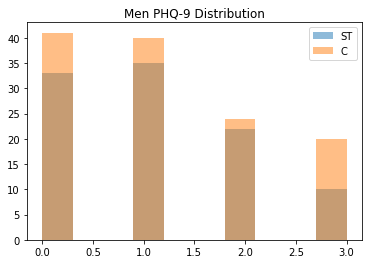

In [15]:
plt.hist(manST9, alpha = 0.5, label = "ST")
plt.hist(manC9, alpha = 0.5, label = "C")
plt.legend()
plt.title("Men PHQ-9 Distribution")
plt.show()

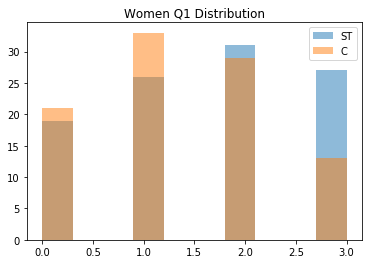

In [26]:
plt.hist(womanST9, alpha = 0.5, label = "ST")
plt.hist(womanC9, alpha = 0.5, label = "C")
plt.legend()
plt.title("Women Q1 Distribution")
plt.show()

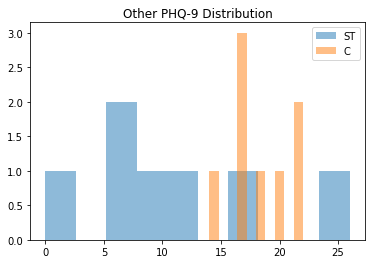

In [22]:
plt.hist(otherST9, alpha = 0.5, label = "ST")
plt.hist(otherC9, alpha = 0.5, label = "C")
plt.legend()
plt.title("Other PHQ-9 Distribution")
plt.show()

In [134]:
#https://docs.pymc.io/notebooks/BEST.html

Qs = ["PHQ-Q1", "PHQ-Q2", "PHQ-Q3","PHQ-Q4","PHQ-Q5","PHQ-Q6","PHQ-Q7", "PHQ-Q8", "PHQ-Q9", "GAD-Q1", "GAD-Q2", "GAD-Q3", "GAD-Q4", "GAD-Q5", "GAD-Q6", "GAD-Q7"]

for Q in Qs:
    print(Q)
    man = data[data.Gender == 'Man']
    manST = man[man.prolificVersion == 'stereotype threat']
    manC = man[man.prolificVersion == 'control']
    woman = data[data.Gender == 'Woman']
    womanST = woman[woman.prolificVersion == 'stereotype threat']
    womanC = woman[woman.prolificVersion == 'control']
    other = data[data.Gender == 'Other']
    otherST = other[other.prolificVersion == 'stereotype threat']
    otherC = other[other.prolificVersion == 'control']

    manST9 = list(map(int, manST[Q].to_numpy()))
    manC9 = list(map(int, manC[Q].to_numpy()))
    womanST9 = list(map(int, womanST[Q].to_numpy()))
    womanC9 = list(map(int, womanC[Q].to_numpy()))
    otherST9 = list(map(int, otherST[Q].to_numpy()))
    otherC9 = list(map(int, otherC[Q].to_numpy()))

    drug = womanST9
    placebo = womanC9

    y1 = np.array(drug)
    y2 = np.array(placebo)
    y = pd.DataFrame(
        dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
    )

    μ_m = y.value.mean()
    μ_s = y.value.std() * 2

    with pm.Model() as model:
        group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
        group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)

    σ_low = 1
    σ_high = 10

    with model:
        group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
        group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)

    with model:
        ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

    with model:
        λ1 = group1_std ** -2
        λ2 = group2_std ** -2

        group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
        group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

    with model:
        diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
        diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
        effect_size = pm.Deterministic(
            "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
        )

    with model:
        trace = pm.sample(2000)

    print(pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"]))

PHQ-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1286 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.289  0.154  -0.005    0.566      0.002    0.001   
difference of stds   0.039  0.079  -0.107    0.193      0.001    0.001   
effect size          0.270  0.144   0.000    0.536      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    6643.0    5421.0    1.0  
difference of stds     4935.0    5352.0    1.0  
effect size            6706.0    5402.0    1.0  
PHQ-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1201 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.240  0.162  -0.049    0.555      0.002    0.002   
difference of stds  -0.003  0.095  -0.185    0.173      0.001    0.001   
effect size          0.218  0.148  -0.050    0.497      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5712.0    4629.0    1.0  
difference of stds     5270.0    5226.0    1.0  
effect size            5801.0    4820.0    1.0  
PHQ-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1099 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.115  0.160  -0.185    0.409      0.002    0.002   
difference of stds   0.036  0.101  -0.165    0.219      0.001    0.001   
effect size          0.102  0.142  -0.177    0.354      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5324.0    4867.0    1.0  
difference of stds     6034.0    5474.0    1.0  
effect size            5389.0    4982.0    1.0  
PHQ-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1000 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.050  0.155  -0.226    0.356      0.002    0.002   
difference of stds   0.019  0.085  -0.143    0.181      0.001    0.001   
effect size          0.047  0.143  -0.226    0.314      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5782.0    4673.0    1.0  
difference of stds     5301.0    5067.0    1.0  
effect size            5874.0    4763.0    1.0  
PHQ-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 976 seconds.
The acceptance probability does not match the target. It is 0.6916263556691239, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.276  0.163  -0.030    0.567      0.002    0.002   
difference of stds   0.076  0.103  -0.114    0.272      0.001    0.001   
effect size          0.245  0.144  -0.029    0.504      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5561.0    4786.0    1.0  
difference of stds     4688.0    5556.0    1.0  
effect size            5609.0    5080.0    1.0  
PHQ-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 996 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.281  0.170  -0.026    0.610      0.002    0.002   
difference of stds   0.107  0.112  -0.107    0.310      0.002    0.001   
effect size          0.242  0.147  -0.022    0.525      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    6665.0    5132.0    1.0  
difference of stds     4867.0    4777.0    1.0  
effect size            6740.0    5132.0    1.0  
PHQ-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 937 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.197  0.167  -0.118    0.514      0.002    0.002   
difference of stds   0.044  0.112  -0.157    0.264      0.002    0.001   
effect size          0.172  0.146  -0.091    0.458      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    6204.0    4994.0    1.0  
difference of stds     4442.0    5174.0    1.0  
effect size            6349.0    4982.0    1.0  
PHQ-Q8


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 971 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.216  0.151  -0.074    0.492      0.002    0.002   
difference of stds   0.055  0.059  -0.045    0.172      0.001    0.001   
effect size          0.206  0.144  -0.067    0.469      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4492.0    4391.0    1.0  
difference of stds     5034.0    5455.0    1.0  
effect size            4532.0    4643.0    1.0  
PHQ-Q9


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 826 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.230  0.150  -0.050    0.516      0.002    0.001   
difference of stds   0.024  0.044  -0.056    0.111      0.001    0.000   
effect size          0.223  0.145  -0.058    0.489      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5728.0    5383.0    1.0  
difference of stds     5683.0    5296.0    1.0  
effect size            5773.0    5383.0    1.0  
GAD-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 932 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.075  0.153  -0.229    0.344      0.002    0.002   
difference of stds   0.009  0.082  -0.138    0.170      0.001    0.001   
effect size          0.069  0.142  -0.211    0.321      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5721.0    5093.0    1.0  
difference of stds     5516.0    5467.0    1.0  
effect size            5810.0    5077.0    1.0  
GAD-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 896 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.239  0.160  -0.057    0.540      0.002    0.002   
difference of stds   0.059  0.100  -0.132    0.246      0.001    0.001   
effect size          0.213  0.143  -0.050    0.480      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5598.0    5006.0    1.0  
difference of stds     6080.0    5323.0    1.0  
effect size            5703.0    4977.0    1.0  
GAD-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 905 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.282  0.161  -0.025    0.577      0.002    0.002   
difference of stds   0.080  0.100  -0.097    0.281      0.002    0.001   
effect size          0.251  0.144  -0.009    0.523      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    6070.0    5088.0    1.0  
difference of stds     4038.0    3158.0    1.0  
effect size            6129.0    5375.0    1.0  
GAD-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 924 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.162  0.159  -0.134    0.460      0.002    0.002   
difference of stds  -0.005  0.091  -0.177    0.166      0.001    0.001   
effect size          0.148  0.145  -0.103    0.439      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4911.0    4147.0    1.0  
difference of stds     4417.0    4732.0    1.0  
effect size            4964.0    4266.0    1.0  
GAD-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 979 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.304  0.161   0.018    0.616      0.002    0.002   
difference of stds   0.079  0.090  -0.086    0.255      0.001    0.001   
effect size          0.277  0.146   0.016    0.563      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5355.0    4574.0    1.0  
difference of stds     5295.0    4634.0    1.0  
effect size            5512.0    5156.0    1.0  
GAD-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 956 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.270  0.158  -0.030    0.569      0.002    0.002   
difference of stds   0.047  0.081  -0.097    0.212      0.001    0.001   
effect size          0.251  0.147  -0.027    0.527      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4882.0    4871.0    1.0  
difference of stds     5803.0    5432.0    1.0  
effect size            4948.0    4871.0    1.0  
GAD-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 890 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.247  0.161  -0.059    0.540      0.002    0.002   
difference of stds   0.088  0.099  -0.094    0.278      0.001    0.001   
effect size          0.221  0.144  -0.048    0.485      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5869.0    5297.0    1.0  
difference of stds     5515.0    5188.0    1.0  
effect size            5981.0    5307.0    1.0  


In [135]:
#https://docs.pymc.io/notebooks/BEST.html

Qs = ["PHQ-Q1", "PHQ-Q2", "PHQ-Q3","PHQ-Q4","PHQ-Q5","PHQ-Q6","PHQ-Q7", "PHQ-Q8", "PHQ-Q9", "GAD-Q1", "GAD-Q2", "GAD-Q3", "GAD-Q4", "GAD-Q5", "GAD-Q6", "GAD-Q7"]

for Q in Qs:
    print(Q)
    man = data[data.Gender == 'Man']
    manST = man[man.prolificVersion == 'stereotype threat']
    manC = man[man.prolificVersion == 'control']
    woman = data[data.Gender == 'Woman']
    womanST = woman[woman.prolificVersion == 'stereotype threat']
    womanC = woman[woman.prolificVersion == 'control']
    other = data[data.Gender == 'Other']
    otherST = other[other.prolificVersion == 'stereotype threat']
    otherC = other[other.prolificVersion == 'control']

    manST9 = list(map(int, manST[Q].to_numpy()))
    manC9 = list(map(int, manC[Q].to_numpy()))
    womanST9 = list(map(int, womanST[Q].to_numpy()))
    womanC9 = list(map(int, womanC[Q].to_numpy()))
    otherST9 = list(map(int, otherST[Q].to_numpy()))
    otherC9 = list(map(int, otherC[Q].to_numpy()))

    drug = otherST9
    placebo = otherC9

    y1 = np.array(drug)
    y2 = np.array(placebo)
    y = pd.DataFrame(
        dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
    )

    μ_m = y.value.mean()
    μ_s = y.value.std() * 2

    with pm.Model() as model:
        group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
        group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)

    σ_low = 1
    σ_high = 10

    with model:
        group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
        group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)

    with model:
        ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

    with model:
        λ1 = group1_std ** -2
        λ2 = group2_std ** -2

        group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
        group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

    with model:
        diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
        diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
        effect_size = pm.Deterministic(
            "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
        )

    with model:
        trace = pm.sample(2000)

    print(pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"]))

PHQ-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 150 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.657  0.727  -2.082    0.670      0.010    0.008   
difference of stds   0.137  0.625  -1.074    1.337      0.008    0.005   
effect size         -0.484  0.513  -1.381    0.550      0.006    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    5591.0    4791.0    1.0  
difference of stds     7165.0    6274.0    1.0  
effect size            6586.0    5628.0    1.0  
PHQ-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 156 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.194  0.703  -1.519    1.112      0.010    0.009   
difference of stds   0.194  0.587  -0.834    1.394      0.007    0.006   
effect size         -0.144  0.498  -1.066    0.807      0.006    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    5331.0    5031.0    1.0  
difference of stds     6505.0    5418.0    1.0  
effect size            6118.0    5689.0    1.0  
PHQ-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 153 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -1.366  0.775  -2.843    0.092      0.011    0.008   
difference of stds   0.494  0.719  -0.581    1.899      0.009    0.007   
effect size         -0.965  0.555  -1.967    0.126      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    5466.0    4434.0    1.0  
difference of stds     5922.0    5724.0    1.0  
effect size            6204.0    4421.0    1.0  
PHQ-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 155 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -1.986  0.743  -3.375   -0.555      0.010    0.007   
difference of stds   0.408  0.672  -0.608    1.734      0.009    0.007   
effect size         -1.435  0.587  -2.561   -0.370      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    6022.0    5029.0    1.0  
difference of stds     5495.0    5623.0    1.0  
effect size            6493.0    4740.0    1.0  
PHQ-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 157 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.737  0.783  -2.115    0.878      0.010    0.008   
difference of stds   0.339  0.695  -0.923    1.658      0.009    0.007   
effect size         -0.518  0.525  -1.498    0.466      0.006    0.004   

                     ess_bulk  ess_tail  r_hat  
difference of means    6056.0    5064.0    1.0  
difference of stds     6892.0    6046.0    1.0  
effect size            6885.0    5523.0    1.0  
PHQ-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 152 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.774  0.771  -2.209    0.658      0.011    0.008   
difference of stds   0.213  0.697  -1.049    1.558      0.009    0.007   
effect size         -0.544  0.521  -1.501    0.452      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    5212.0    4628.0    1.0  
difference of stds     6654.0    5433.0    1.0  
effect size            6064.0    4815.0    1.0  
PHQ-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 146 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.757  0.734  -2.171    0.613      0.010    0.008   
difference of stds   0.298  0.659  -0.809    1.597      0.009    0.006   
effect size         -0.543  0.507  -1.450    0.459      0.006    0.004   

                     ess_bulk  ess_tail  r_hat  
difference of means    5442.0    4811.0    1.0  
difference of stds     6255.0    5925.0    1.0  
effect size            6342.0    5100.0    1.0  
PHQ-Q8


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 158 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.290  0.738  -1.644    1.113      0.011    0.009   
difference of stds   0.227  0.633  -0.922    1.438      0.008    0.006   
effect size         -0.209  0.508  -1.214    0.699      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    4588.0    4251.0    1.0  
difference of stds     6499.0    5425.0    1.0  
effect size            5342.0    4720.0    1.0  
PHQ-Q9


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 158 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.409  0.840  -2.049    1.138      0.012    0.010   
difference of stds   0.158  0.762  -1.272    1.661      0.010    0.007   
effect size         -0.273  0.523  -1.214    0.748      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    4920.0    4105.0    1.0  
difference of stds     6037.0    5756.0    1.0  
effect size            5999.0    5532.0    1.0  
GAD-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 154 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -1.258  0.703  -2.580    0.052      0.009    0.007   
difference of stds   0.205  0.572  -0.886    1.211      0.008    0.006   
effect size         -0.952  0.535  -1.958    0.036      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    6095.0    5045.0    1.0  
difference of stds     5290.0    6054.0    1.0  
effect size            6767.0    5258.0    1.0  
GAD-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 158 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -1.057  0.724  -2.413    0.361      0.010    0.007   
difference of stds  -0.027  0.600  -1.131    1.154      0.007    0.005   
effect size         -0.779  0.533  -1.813    0.211      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    5515.0    4283.0    1.0  
difference of stds     7537.0    6087.0    1.0  
effect size            6067.0    4370.0    1.0  
GAD-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 159 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.930  0.740  -2.286    0.431      0.010    0.007   
difference of stds   0.193  0.666  -1.047    1.443      0.009    0.006   
effect size         -0.672  0.524  -1.654    0.304      0.006    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    5896.0    4486.0    1.0  
difference of stds     6638.0    5862.0    1.0  
effect size            6492.0    4868.0    1.0  
GAD-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 167 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -1.158  0.838  -2.807    0.368      0.011    0.008   
difference of stds   0.496  0.754  -0.718    2.041      0.010    0.008   
effect size         -0.771  0.550  -1.865    0.194      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    5772.0    4744.0    1.0  
difference of stds     6296.0    6148.0    1.0  
effect size            6564.0    4989.0    1.0  
GAD-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 156 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.956  0.802  -2.607    0.442      0.012    0.008   
difference of stds   0.207  0.712  -1.201    1.515      0.010    0.007   
effect size         -0.667  0.542  -1.700    0.354      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    4947.0    3725.0    1.0  
difference of stds     5698.0    6010.0    1.0  
effect size            5662.0    3893.0    1.0  
GAD-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 164 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -1.441  0.770  -2.911   -0.022      0.012    0.008   
difference of stds   0.250  0.679  -0.987    1.464      0.010    0.008   
effect size         -1.046  0.568  -2.116    0.024      0.008    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    4594.0    3422.0    1.0  
difference of stds     5448.0    5140.0    1.0  
effect size            5116.0    3312.0    1.0  
GAD-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 161 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.302  0.717  -1.621    1.083      0.009    0.008   
difference of stds   0.240  0.649  -0.862    1.541      0.008    0.006   
effect size         -0.222  0.498  -1.172    0.688      0.006    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    5833.0    4857.0    1.0  
difference of stds     6329.0    5905.0    1.0  
effect size            6741.0    5523.0    1.0  


In [136]:
#https://docs.pymc.io/notebooks/BEST.html

Qs = ["PHQ-Q1", "PHQ-Q2", "PHQ-Q3","PHQ-Q4","PHQ-Q5","PHQ-Q6","PHQ-Q7", "PHQ-Q8", "PHQ-Q9", "GAD-Q1", "GAD-Q2", "GAD-Q3", "GAD-Q4", "GAD-Q5", "GAD-Q6", "GAD-Q7"]

for Q in Qs:
    print(Q)
    man = data[data.Gender == 'Man']
    manST = man[man.prolificVersion == 'stereotype threat']
    manC = man[man.prolificVersion == 'control']
    woman = data[data.Gender == 'Woman']
    womanST = woman[woman.prolificVersion == 'stereotype threat']
    womanC = woman[woman.prolificVersion == 'control']
    other = data[data.Gender == 'Other']
    otherST = other[other.prolificVersion == 'stereotype threat']
    otherC = other[other.prolificVersion == 'control']

    manST9 = list(map(int, manST[Q].to_numpy()))
    manC9 = list(map(int, manC[Q].to_numpy()))
    womanST9 = list(map(int, womanST[Q].to_numpy()))
    womanC9 = list(map(int, womanC[Q].to_numpy()))
    otherST9 = list(map(int, otherST[Q].to_numpy()))
    otherC9 = list(map(int, otherC[Q].to_numpy()))

    drug = manST9
    placebo = manC9

    y1 = np.array(drug)
    y2 = np.array(placebo)
    y = pd.DataFrame(
        dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
    )

    μ_m = y.value.mean()
    μ_s = y.value.std() * 2

    with pm.Model() as model:
        group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
        group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)

    σ_low = 1
    σ_high = 10

    with model:
        group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
        group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)

    with model:
        ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

    with model:
        λ1 = group1_std ** -2
        λ2 = group2_std ** -2

        group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
        group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

    with model:
        diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
        diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
        effect_size = pm.Deterministic(
            "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
        )

    with model:
        trace = pm.sample(2000)

    print(pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"]))

PHQ-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1331 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.099  0.148  -0.389    0.168      0.002    0.002   
difference of stds  -0.033  0.072  -0.172    0.101      0.001    0.001   
effect size         -0.092  0.138  -0.351    0.170      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5290.0    4904.0    1.0  
difference of stds     5140.0    5401.0    1.0  
effect size            5378.0    4936.0    1.0  
PHQ-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1594 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8789148410804416, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.188  0.148  -0.460    0.087      0.002    0.002   
difference of stds  -0.047  0.078  -0.205    0.093      0.001    0.001   
effect size         -0.175  0.137  -0.430    0.079      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4864.0    4414.0    1.0  
difference of stds     3738.0    4941.0    1.0  
effect size            4916.0    4362.0    1.0  
PHQ-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1590 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.031  0.156  -0.321    0.269      0.002    0.002   
difference of stds   0.034  0.111  -0.179    0.239      0.002    0.001   
effect size         -0.027  0.133  -0.279    0.226      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5854.0    5345.0    1.0  
difference of stds     5082.0    5277.0    1.0  
effect size            5929.0    5552.0    1.0  
PHQ-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1236 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.101  0.147  -0.373    0.178      0.002    0.002   
difference of stds  -0.025  0.078  -0.170    0.130      0.001    0.001   
effect size         -0.094  0.136  -0.354    0.157      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5431.0    5232.0    1.0  
difference of stds     5265.0    5291.0    1.0  
effect size            5484.0    5182.0    1.0  
PHQ-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1314 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.070  0.145  -0.329    0.207      0.002    0.002   
difference of stds  -0.013  0.067  -0.143    0.115      0.001    0.001   
effect size         -0.066  0.136  -0.318    0.187      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5032.0    4642.0    1.0  
difference of stds     4514.0    5092.0    1.0  
effect size            5083.0    4819.0    1.0  
PHQ-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1466 seconds.
The acceptance probability does not match the target. It is 0.9286486639053262, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.103  0.155  -0.393    0.186      0.002    0.002   
difference of stds  -0.026  0.101  -0.209    0.166      0.001    0.001   
effect size         -0.091  0.136  -0.338    0.170      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5101.0    4307.0    1.0  
difference of stds     5789.0    5392.0    1.0  
effect size            5188.0    4220.0    1.0  
PHQ-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1560 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.159  0.147  -0.437    0.113      0.002    0.002   
difference of stds  -0.035  0.077  -0.181    0.112      0.001    0.001   
effect size         -0.148  0.136  -0.402    0.109      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5638.0    4564.0    1.0  
difference of stds     4613.0    5819.0    1.0  
effect size            5694.0    4534.0    1.0  
PHQ-Q8


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1125 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.072  0.137  -0.333    0.175      0.002    0.001   
difference of stds  -0.008  0.030  -0.067    0.052      0.000    0.000   
effect size         -0.070  0.134  -0.325    0.171      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    6349.0    5380.0    1.0  
difference of stds     6901.0    6052.0    1.0  
effect size            6379.0    5324.0    1.0  
PHQ-Q9


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1162 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.031  0.139  -0.293    0.226      0.002    0.002   
difference of stds  -0.008  0.043  -0.095    0.071      0.001    0.000   
effect size         -0.030  0.135  -0.287    0.215      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4985.0    4521.0    1.0  
difference of stds     6500.0    5724.0    1.0  
effect size            5027.0    4504.0    1.0  
GAD-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1061 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.180  0.149  -0.472    0.086      0.002    0.002   
difference of stds  -0.061  0.083  -0.216    0.096      0.001    0.001   
effect size         -0.165  0.137  -0.416    0.095      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5183.0    4517.0    1.0  
difference of stds     4901.0    5335.0    1.0  
effect size            5255.0    4760.0    1.0  
GAD-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1224 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.031  0.146  -0.315    0.234      0.002    0.002   
difference of stds   0.012  0.070  -0.118    0.151      0.001    0.001   
effect size         -0.029  0.137  -0.293    0.223      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5578.0    5458.0    1.0  
difference of stds     6016.0    6096.0    1.0  
effect size            5665.0    5389.0    1.0  
GAD-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1346 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.002  0.150  -0.281    0.276      0.002    0.002   
difference of stds  -0.008  0.089  -0.172    0.162      0.001    0.001   
effect size         -0.002  0.136  -0.249    0.258      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5608.0    4994.0    1.0  
difference of stds     5117.0    6055.0    1.0  
effect size            5700.0    5028.0    1.0  
GAD-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1434 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.042  0.148  -0.317    0.233      0.002    0.002   
difference of stds  -0.004  0.076  -0.143    0.147      0.001    0.001   
effect size         -0.039  0.138  -0.300    0.212      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5520.0    4250.0    1.0  
difference of stds     5755.0    5789.0    1.0  
effect size            5585.0    4397.0    1.0  
GAD-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1383 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.031  0.145  -0.316    0.235      0.002    0.002   
difference of stds  -0.001  0.055  -0.113    0.104      0.001    0.001   
effect size         -0.030  0.139  -0.310    0.218      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4941.0    4373.0    1.0  
difference of stds     5964.0    5695.0    1.0  
effect size            4976.0    4450.0    1.0  
GAD-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2482 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.189  0.141  -0.444    0.090      0.002    0.002   
difference of stds  -0.033  0.067  -0.163    0.092      0.001    0.001   
effect size         -0.178  0.133  -0.428    0.074      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    4715.0    4381.0    1.0  
difference of stds     5206.0    5059.0    1.0  
effect size            4755.0    4552.0    1.0  
GAD-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1132 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.035  0.144  -0.233    0.306      0.002    0.002   
difference of stds   0.022  0.066  -0.103    0.153      0.001    0.001   
effect size          0.033  0.136  -0.217    0.293      0.002    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    5949.0    5365.0    1.0  
difference of stds     5675.0    5508.0    1.0  
effect size            6009.0    5442.0    1.0  
